In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
# Step 1: Generate Synthetic Dataset
np.random.seed(0)
X = np.random.rand(100, 1)  # Generate 100 random input samples (features)
y = 12 * X + 89   # Generate corresponding output targets

In [5]:
# Convert NumPy arrays to PyTorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

In [6]:
# Train Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # Define a linear layer (input size=1, output size=1)

    def forward(self, x):
        return self.linear(x)

In [7]:
# LinearRegression model
model = LinearRegression()

# loss function (Mean Squared Error)
criterion = nn.MSELoss()

# optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training progress
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 106.25090789794922
Epoch [200/1000], Loss: 33.69584655761719
Epoch [300/1000], Loss: 25.450401306152344
Epoch [400/1000], Loss: 19.457609176635742
Epoch [500/1000], Loss: 14.877483367919922
Epoch [600/1000], Loss: 11.37547492980957
Epoch [700/1000], Loss: 8.697811126708984
Epoch [800/1000], Loss: 6.650445938110352
Epoch [900/1000], Loss: 5.085022449493408
Epoch [1000/1000], Loss: 3.888057231903076


Final Mean Squared Error (MSE): 3.877636432647705


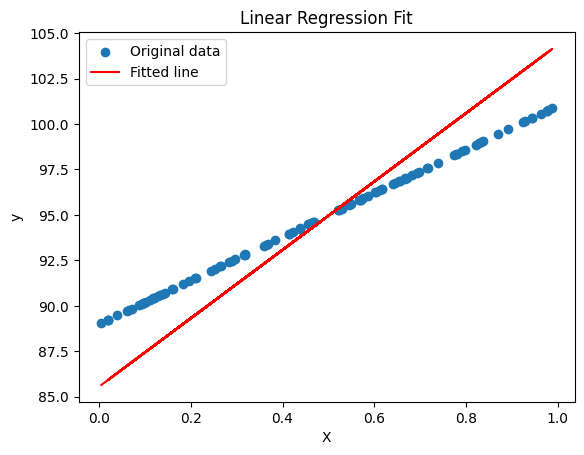

In [12]:
# Evaluate Model's Performance
# Compute predictions using the trained model
with torch.no_grad():
    predicted = model(X_tensor)

# Compute Mean Squared Error (MSE) between predictions and true targets
mse = criterion(predicted, y_tensor)
print(f'Final Mean Squared Error (MSE): {mse.item()}')

# Plotting the original data and the fitted line
plt.scatter(X, y, label='Original data')
plt.plot(X, predicted.numpy(), color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()